### In this notebook I will:
- Inspect and create subsets od given data
- Clean based on these segmentations
- Prepare for modeling

### Load Packages:

In [1]:
# Numpy will be used for Linear Algebra
import numpy as np

# Pandas will be used for DataFrames
import pandas as pd
# Display all Columns 
pd.set_option('display.max_columns', None)

# Matplotlib for Visualization
import matplotlib.pyplot as plt
# Display plots in notebook
%matplotlib inline

# Seaborn for easier Visualization
import seaborn as sns
# Change color scheme
sns.set_style("whitegrid")

# Model Selection imports
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression,RFE,SelectKBest
from sklearn.tree import DecisionTreeRegressor

# Sys for size of Dataset
import sys

## 1. Load the Data

In [2]:
# Load dataset into a pandas DataFrame
df = pd.read_csv('../Datasets/Merged_Data_2/GRADUATION_WITH_CENSUS.csv',encoding = 'Latin1')

#### Make sure to have 0 nulls on All_Rate_112; hence, fill in nulls with median to corresponding local education agency.

In [3]:
df.ALL_RATE_1112 = df.groupby('leanm11')['ALL_RATE_1112'].apply(lambda x: x.fillna(x.median()))
df.ALL_RATE_1112 = df.ALL_RATE_1112.fillna(df.ALL_RATE_1112.median())

## 2. Inspect/Create Subsets

### A. Geography Variables

#### -Create DF for Geography

In [4]:
# Grab coluumns that only contain georaphy data and make into a list 
geography_list = df.columns[30:44].tolist()
# Create the DataFrame
geography_df = df.loc[:,geography_list]

#### -Check and drop nulls

In [5]:
geography_df.isnull().sum()
geography_df.drop('Flag',axis = 1, inplace = True)
df.drop('Flag',axis = 1, inplace = True)

In [6]:
geography_df.drop(['County_name','State.1','GIDTR'],axis=1,inplace=True)
df.drop(['County_name','State.1','GIDTR'],axis=1,inplace=True)

In [7]:
geo_dum = pd.get_dummies(geography_df,prefix=['State_name'],columns = ['State_name'])
state_dummies = pd.get_dummies(df,prefix=['State_name'],columns = ['State_name'])

In [8]:
features_df = geo_dum
features_dff = state_dummies

#### -Print and plot Feature importances for Geographical Variables
Note: Previously I ran different models for feature selection and Random Forest gave me the best score; hence, I will use Random Forest for all my feature importance in all my categorized variables

In [9]:
features = [col for col in features_df.columns if col != 'all_rate_1112']
X = features_df[features]
y = df['ALL_RATE_1112']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [10]:
geographical_forest = RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1)
geographical_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [11]:
geographical_forest.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [12]:
geographical_forest_df = pd.DataFrame({'Feature':X.columns,"Importance":geographical_forest.feature_importances_})
geographical_forest_df.sort_values("Importance", ascending = False, inplace = True)
geographical_forest_df.head(4)

,Feature,Importance
3,LAND_AREA,0.311375
8,Tot_Population_CEN_2010,0.114742
1,Tract,0.102595
0,County.1,0.083873


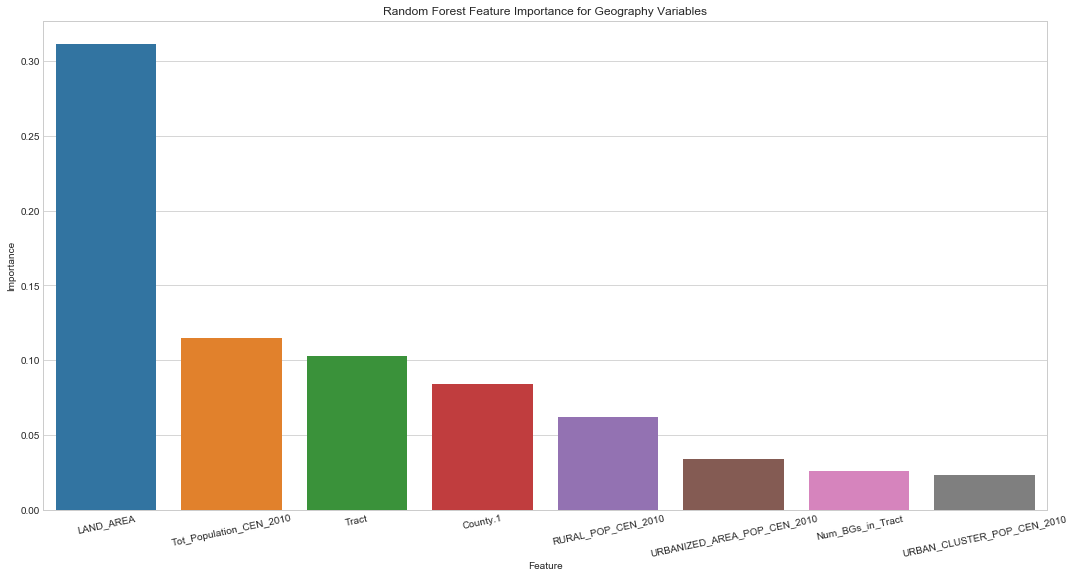

In [13]:
fig = plt.figure(figsize=(18,9))
fig = sns.barplot(x='Feature', y='Importance', data=geographical_forest_df.head(8))
fig.set_title('Random Forest Feature Importance for Geography Variables');
fig = plt.xticks(rotation=12)
plt.savefig("../Images/Random Forest Feature Importance for Geography Variables.jpg",bbox_inches='tight',pad_inches=.5);

### B. Population Variables

#### -Create a df for Population

In [14]:
population_list = df.columns[44:230].tolist()
population_df = df.loc[:,population_list]

#### -Check and drop nulls

In [15]:
missing_population_variables = population_df.isnull().sum()
total_population_variables = population_df.count()
missing_population_df = pd.concat([missing_population_variables, total_population_variables],axis = 1, keys = ['Missing','Total Values'])

In [16]:
population_df.drop(5605,inplace = True)
population_df.drop(6122,inplace = True)
population_df.drop(6211,inplace = True)
df.drop(5605,inplace = True)
df.drop(6122,inplace = True)
df.drop(6211,inplace = True)

#### -Print and plot Feature importances for Geographical Variables

In [17]:
features = [col for col in population_df.columns if col != 'all_rate_1112']
X = population_df[features]
y = df['ALL_RATE_1112']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [18]:
population_forest = RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1)
population_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   13.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [19]:
population_forest.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [20]:
population_forest_df = pd.DataFrame({'Feature':X.columns,"Importance":population_forest.feature_importances_})
population_forest_df.sort_values("Importance", ascending = False, inplace = True)
population_forest_df.head(4)

,Feature,Importance
29,NH_White_alone_ACS_08_12,0.055405
28,NH_White_alone_CEN_2010,0.054026
34,NH_AIAN_alone_CEN_2010,0.045125
134,College_ACS_08_12,0.042592


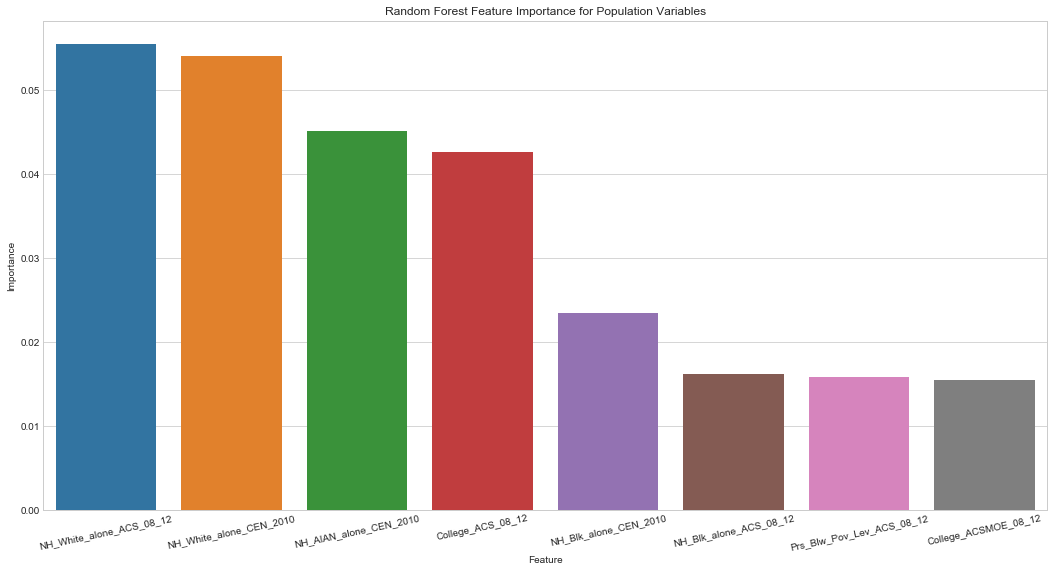

In [21]:
fig = plt.figure(figsize=(18,9))
fig = sns.barplot(x='Feature', y='Importance', data=population_forest_df.head(8))
fig.set_title('Random Forest Feature Importance for Population Variables');
fig = plt.xticks(rotation=12)
plt.savefig("../Images/Random Forest Feature Importance for Population Variables.jpg",bbox_inches='tight',pad_inches=.5);

### C. Household Variables

#### -Create a df for household

In [22]:
household_list = df.columns[230:275].tolist()
household_df = df.loc[:,household_list]

#### -Check and drop nulls

In [23]:
household_df=household_df.fillna(household_df.median(),inplace = True)

In [24]:
for i in ['Med_HHD_Inc_ACSMOE_08_12', 'Aggregate_HH_INC_ACSMOE_08_12', 'Aggregate_HH_INC_ACS_08_12','Med_HHD_Inc_ACS_08_12']:
        household_df[i] = household_df[i].str.replace('$','')
        household_df[i] = household_df[i].str.replace(',','')
        household_df[i] = household_df[i].astype('float')

In [25]:
for i in ['Med_HHD_Inc_ACSMOE_08_12', 'Aggregate_HH_INC_ACSMOE_08_12', 'Aggregate_HH_INC_ACS_08_12','Med_HHD_Inc_ACS_08_12']:
        df[i] = df[i].str.replace('$','')
        df[i] = df[i].str.replace(',','')
        df[i] = df[i].astype('float')

In [26]:
household_df=household_df.fillna(household_df.median(),inplace = True)

#### -Print and plot Feature importances for household variables

In [27]:
features = [col for col in household_df.columns if col != 'all_rate_1112']
X = household_df[features]
y = df['ALL_RATE_1112']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [28]:
household_forest = RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1)
household_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.3s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [29]:
household_forest.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [30]:
household_forest_df = pd.DataFrame({'Feature':X.columns,"Importance":household_forest.feature_importances_})
household_forest_df.sort_values("Importance", ascending = False, inplace = True)
household_forest_df.head(4)

,Feature,Importance
39,Aggregate_HH_INC_ACS_08_12,0.104125
37,Med_HHD_Inc_ACS_08_12,0.071565
15,Female_No_HB_CEN_2010,0.054284
9,MrdCple_Fmly_HHD_CEN_2010,0.034658


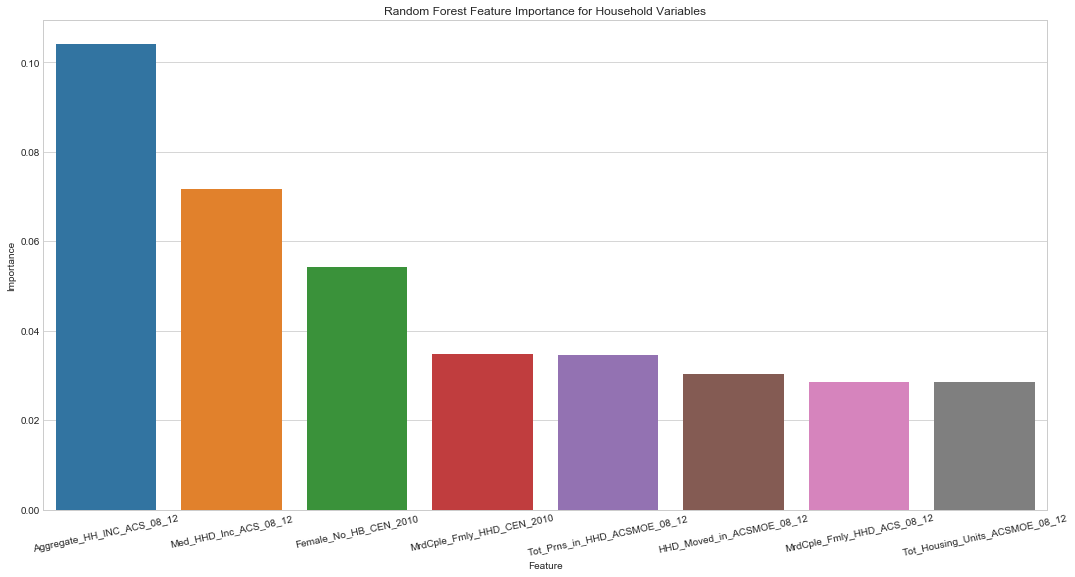

In [31]:
fig = plt.figure(figsize=(18,9))
fig = sns.barplot(x='Feature', y='Importance', data=household_forest_df.head(8))
fig.set_title('Random Forest Feature Importance for Household Variables');
fig = plt.xticks(rotation=12)
plt.savefig("../Images/Random Forest Feature Importance for Household Variables.jpg",bbox_inches='tight',pad_inches=.5);

### D. Housing Variables

#### -Create a df for housing

In [32]:
housing_unit_list = df.columns[276:310].tolist()
housing_unit_df = df.loc[:,housing_unit_list]

#### -Check and drop nulls

In [33]:
for i in ['Med_House_value_ACS_08_12','Med_House_value_ACSMOE_08_12','Aggr_House_Value_ACS_08_12','Aggr_House_Value_ACSMOE_08_12']:
        housing_unit_df[i] = housing_unit_df[i].str.replace('$','')
        housing_unit_df[i] = housing_unit_df[i].str.replace(',','')
        housing_unit_df[i] = housing_unit_df[i].astype('float')

In [34]:
for i in ['Med_House_value_ACS_08_12','Med_House_value_ACSMOE_08_12','Aggr_House_Value_ACS_08_12','Aggr_House_Value_ACSMOE_08_12']:
        df[i] = df[i].str.replace('$','')
        df[i] = df[i].str.replace(',','')
        df[i] = df[i].astype('float')

In [35]:
housing_unit_df.Aggr_House_Value_ACSMOE_08_12 = housing_unit_df.Aggr_House_Value_ACSMOE_08_12.fillna(housing_unit_df.Aggr_House_Value_ACSMOE_08_12.median())
housing_unit_df.Med_House_value_ACS_08_12 = housing_unit_df.Med_House_value_ACS_08_12.fillna(housing_unit_df.Med_House_value_ACS_08_12.median())
housing_unit_df.Med_House_value_ACSMOE_08_12 = housing_unit_df.Med_House_value_ACSMOE_08_12.fillna(housing_unit_df.Med_House_value_ACSMOE_08_12.median())
housing_unit_df.Aggr_House_Value_ACS_08_12 = housing_unit_df.Aggr_House_Value_ACS_08_12.fillna(housing_unit_df.Aggr_House_Value_ACS_08_12.median())

In [36]:
df.Aggr_House_Value_ACSMOE_08_12 = df.Aggr_House_Value_ACSMOE_08_12.fillna(df.Aggr_House_Value_ACSMOE_08_12.median())
df.Med_House_value_ACS_08_12 = df.Med_House_value_ACS_08_12.fillna(df.Med_House_value_ACS_08_12.median())
df.Med_House_value_ACSMOE_08_12 = df.Med_House_value_ACSMOE_08_12.fillna(df.Med_House_value_ACSMOE_08_12.median())
df.Aggr_House_Value_ACS_08_12 = df.Aggr_House_Value_ACS_08_12.fillna(df.Aggr_House_Value_ACS_08_12.median())

In [37]:
housing_unit_df.Aggr_House_Value_ACSMOE_08_12 = housing_unit_df.Aggr_House_Value_ACSMOE_08_12.fillna(housing_unit_df.Aggr_House_Value_ACSMOE_08_12.median())
df.Aggr_House_Value_ACSMOE_08_12 = df.Aggr_House_Value_ACSMOE_08_12.fillna(df.Aggr_House_Value_ACSMOE_08_12.median())

In [38]:
housing_unit_df.drop(["TEA_Mail_Out_Mail_Back_CEN_2010","MailBack_Area_Count_CEN_2010","TEA_Update_Leave_CEN_2010","TEA_Update_Leave_CEN_2010","Census_Mail_Returns_CEN_2010"],axis=1,inplace=True)
df.drop(["TEA_Mail_Out_Mail_Back_CEN_2010","MailBack_Area_Count_CEN_2010","TEA_Update_Leave_CEN_2010","TEA_Update_Leave_CEN_2010","Census_Mail_Returns_CEN_2010"],axis=1,inplace=True)

#### -Print and plot Feature importances for housing variables

In [39]:
features = [col for col in housing_unit_df.columns if col != 'all_rate_1112']
X = housing_unit_df[features]
y = df['ALL_RATE_1112']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [40]:
housing_forest = RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1)
housing_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [41]:
housing_forest.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [42]:
housing_forest_df = pd.DataFrame({'Feature':X.columns,"Importance":housing_forest.feature_importances_})
housing_forest_df.sort_values("Importance", ascending = False, inplace = True)
household_forest_df.head(4)

,Feature,Importance
39,Aggregate_HH_INC_ACS_08_12,0.104125
37,Med_HHD_Inc_ACS_08_12,0.071565
15,Female_No_HB_CEN_2010,0.054284
9,MrdCple_Fmly_HHD_CEN_2010,0.034658


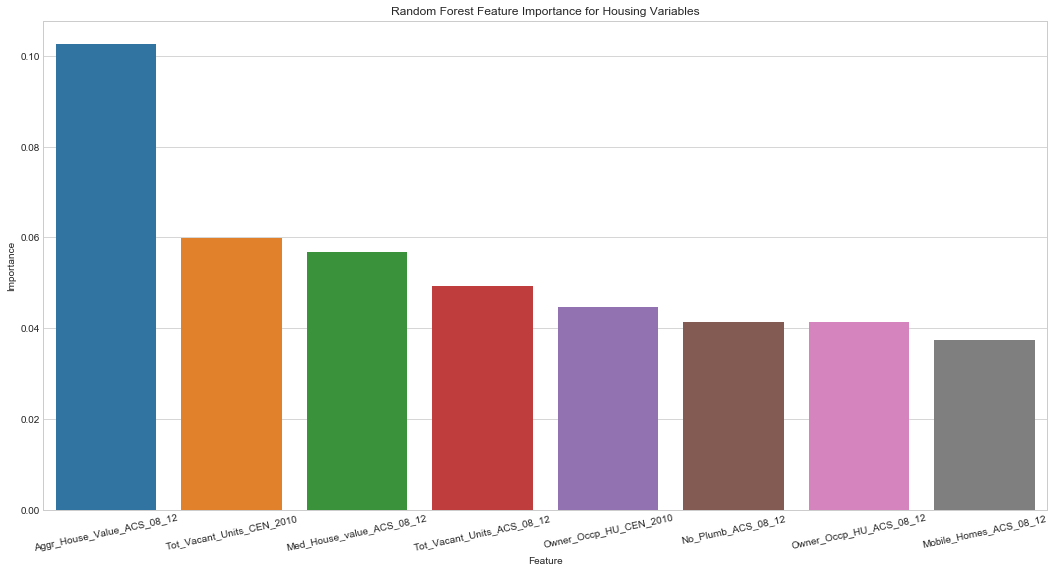

In [43]:
fig = plt.figure(figsize=(18,9))
fig = sns.barplot(x='Feature', y='Importance', data=housing_forest_df.head(8))
fig.set_title('Random Forest Feature Importance for Housing Variables');
fig = plt.xticks(rotation=12)
plt.savefig("../Images/Random Forest Feature Importance for Housing Variables.jpg",bbox_inches='tight',pad_inches=.5);

### E. Calculated Percentages

#### -Create a df for Percentages

In [44]:
percentages_list=df.columns[324:570].tolist()
percentages_df = df.loc[:,percentages_list]

#### -Check and fill nulls

In [45]:
percentages_df=percentages_df.fillna(df.median())

#### -Print and plot Feature importances for percentages

In [46]:
features = [col for col in percentages_df.columns if col != 'all_rate_1112']
X = percentages_df[features]
y = df['ALL_RATE_1112']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [47]:
percentages_forest = RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1)
percentages_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   29.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [48]:
percentages_forest.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   40.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [49]:
percentages_forest_df = pd.DataFrame({'Feature':X.columns,"Importance":percentages_forest.feature_importances_})
percentages_forest_df.sort_values("Importance", ascending = False, inplace = True)
percentages_forest_df.head(4)

,Feature,Importance
240,pct_Census_Mail_Returns_CEN_2010,0.051660
245,pct_FRST_FRMS_CEN_2010,0.043581
188,pct_Female_No_HB_CEN_2010,0.036764
131,pct_College_ACS_08_12,0.022425


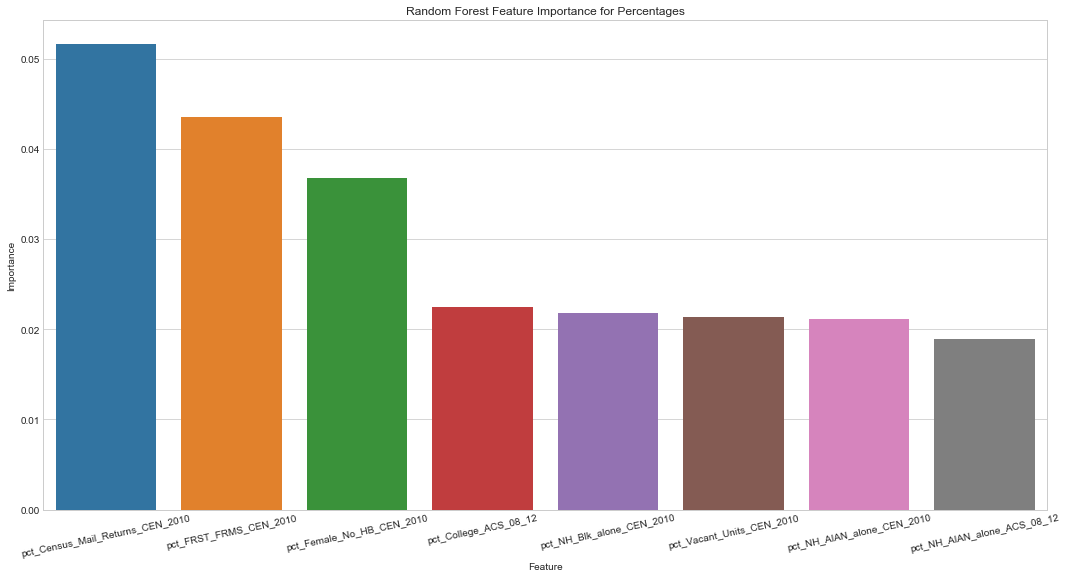

In [50]:
fig = plt.figure(figsize=(18,9))
fig = sns.barplot(x='Feature', y='Importance', data=percentages_forest_df.head(8))
fig.set_title('Random Forest Feature Importance for Percentages');
fig = plt.xticks(rotation=12)
plt.savefig("../Images/Random Forest Feature Importance for Percentages.jpg",bbox_inches='tight',pad_inches=.5);

## 3. Compare Top 8 Features for all Variables

In [51]:
print("Top 8 Features for Percentage Values:")
percentages_values = percentages_forest_df.Feature[:8].tolist()
percentages_values

Top 8 Features for Percentage Values:


['pct_Census_Mail_Returns_CEN_2010',
 'pct_FRST_FRMS_CEN_2010',
 'pct_Female_No_HB_CEN_2010',
 'pct_College_ACS_08_12',
 'pct_NH_Blk_alone_CEN_2010',
 'pct_Vacant_Units_CEN_2010',
 'pct_NH_AIAN_alone_CEN_2010',
 'pct_NH_AIAN_alone_ACS_08_12']

In [52]:
print("Top 8 Features for Household Values:")
household_values = household_forest_df.Feature[:8].tolist()
household_values

Top 8 Features for Household Values:


['Aggregate_HH_INC_ACS_08_12',
 'Med_HHD_Inc_ACS_08_12',
 'Female_No_HB_CEN_2010',
 'MrdCple_Fmly_HHD_CEN_2010',
 'Tot_Prns_in_HHD_ACSMOE_08_12',
 'HHD_Moved_in_ACSMOE_08_12',
 'MrdCple_Fmly_HHD_ACS_08_12',
 'Tot_Housing_Units_ACSMOE_08_12']

In [53]:
print("Top 8 Features for Housing Values:")
housing_values = housing_forest_df.Feature[:8].tolist()
housing_values

Top 8 Features for Housing Values:


['Aggr_House_Value_ACS_08_12',
 'Tot_Vacant_Units_CEN_2010',
 'Med_House_value_ACS_08_12',
 'Tot_Vacant_Units_ACS_08_12',
 'Owner_Occp_HU_CEN_2010',
 'No_Plumb_ACS_08_12',
 'Owner_Occp_HU_ACS_08_12',
 'Mobile_Homes_ACS_08_12']

In [54]:
print("Top 8 Features for Population Values:")
population_values = population_forest_df.Feature[:8].tolist()
population_values

Top 8 Features for Population Values:


['NH_White_alone_ACS_08_12',
 'NH_White_alone_CEN_2010',
 'NH_AIAN_alone_CEN_2010',
 'College_ACS_08_12',
 'NH_Blk_alone_CEN_2010',
 'NH_Blk_alone_ACS_08_12',
 'Prs_Blw_Pov_Lev_ACS_08_12',
 'College_ACSMOE_08_12']

In [55]:
print("Top 8 Features for Geography Values:")
geography_values = geographical_forest_df.Feature[:8].tolist()
geography_values

Top 8 Features for Geography Values:


['LAND_AREA',
 'Tot_Population_CEN_2010',
 'Tract',
 'County.1',
 'RURAL_POP_CEN_2010',
 'URBANIZED_AREA_POP_CEN_2010',
 'Num_BGs_in_Tract',
 'URBAN_CLUSTER_POP_CEN_2010']

## 4. Run a Random Forest for Top Features

#### -Some cleaning

In [56]:
top_values = geography_values + population_values + household_values + household_values + percentages_values

In [57]:
df["pct_Census_Mail_Returns_CEN_2010"]=df["pct_Census_Mail_Returns_CEN_2010"].fillna(df["pct_Census_Mail_Returns_CEN_2010"].median())

In [58]:
df["Aggregate_HH_INC_ACS_08_12"]=df["Aggregate_HH_INC_ACS_08_12"].fillna(df["Aggregate_HH_INC_ACS_08_12"].median())
df["Med_HHD_Inc_ACS_08_12"]=df["Med_HHD_Inc_ACS_08_12"].fillna(df["Med_HHD_Inc_ACS_08_12"].median())

In [59]:
df["pct_FRST_FRMS_CEN_2010"]=df["pct_FRST_FRMS_CEN_2010"].fillna(df["pct_FRST_FRMS_CEN_2010"].median())
df["pct_Female_No_HB_CEN_2010"]=df["pct_Female_No_HB_CEN_2010"].fillna(df["pct_Female_No_HB_CEN_2010"].median())
df["pct_NH_AIAN_alone_CEN_2010"]=df["pct_NH_AIAN_alone_CEN_2010"].fillna(df["pct_NH_AIAN_alone_CEN_2010"].median())
df["pct_NH_Blk_alone_CEN_2010"]=df["pct_NH_Blk_alone_CEN_2010"].fillna(df["pct_NH_Blk_alone_CEN_2010"].median())
df["pct_College_ACS_08_12"]=df["pct_College_ACS_08_12"].fillna(df["pct_College_ACS_08_12"].median())
df["pct_Vacant_Units_CEN_2010"]=df["pct_Vacant_Units_CEN_2010"].fillna(df["pct_Vacant_Units_CEN_2010"].median())
df["pct_Vacant_CEN_2010"]=df["pct_Vacant_CEN_2010"].fillna(df["pct_Vacant_CEN_2010"].median())
df["pct_Tot_Occp_Units_CEN_2010"]=df["pct_Tot_Occp_Units_CEN_2010"].fillna(df["pct_Tot_Occp_Units_CEN_2010"].median())
df["pct_NH_AIAN_alone_ACS_08_12"]=df["pct_NH_AIAN_alone_ACS_08_12"].fillna(df["pct_NH_AIAN_alone_ACS_08_12"].median())

#### -Print and plot Feature importance for Top Features

In [60]:
X = df[top_values]
y = df['ALL_RATE_1112']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [61]:
top_values_forest = RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1)
top_values_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [62]:
top_values_forest.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.8s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [63]:
top_values_forest_df = pd.DataFrame({'Feature':X.columns,"Importance":top_values_forest.feature_importances_})
top_values_forest_df.sort_values("Importance", ascending = False, inplace = True)
top_values_forest_df.head(2)

,Feature,Importance
0,LAND_AREA,0.181417
33,pct_FRST_FRMS_CEN_2010,0.058620


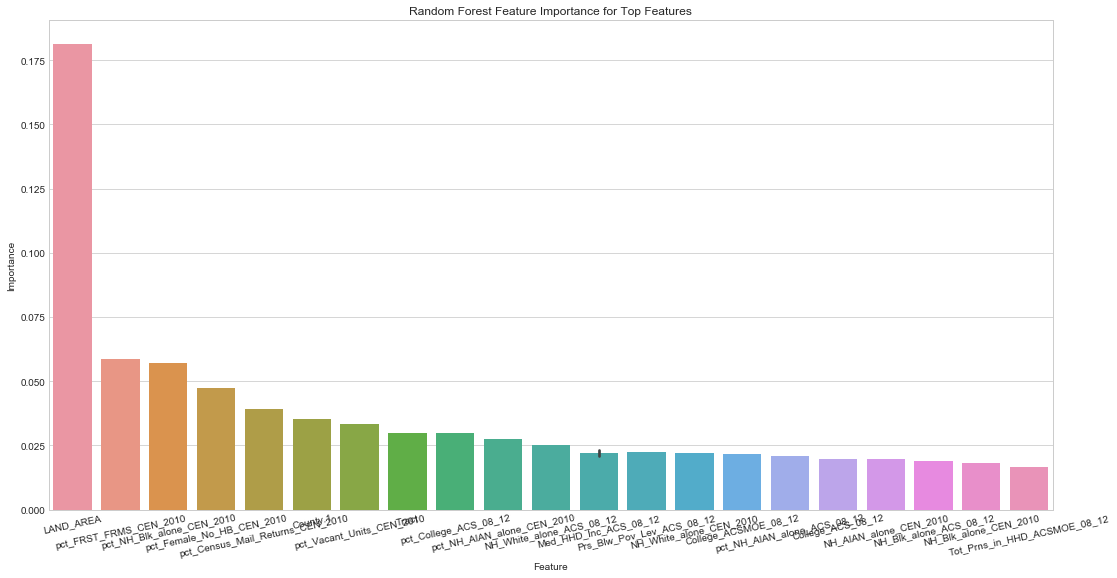

In [64]:
fig = plt.figure(figsize=(18,9))
fig = sns.barplot(x='Feature', y='Importance', data=top_values_forest_df.head(22))
fig.set_title('Random Forest Feature Importance for Top Features');
fig = plt.xticks(rotation=12)
plt.savefig("../Images/Random Forest Feature Importance for Top Features.jpg",bbox_inches='tight',pad_inches=.5);

## 5. Using Select_k_best

In [65]:
select_k_best_features = SelectKBest(RandomForestRegressor(max_depth=None,max_features=0.7,min_samples_split=10,n_estimators=80,verbose = 1,n_jobs = -1))
select_k_best_features

SelectKBest(k=10,
      score_func=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False))

#### Ater running Select K Best, k=10 means that 10 features is sufficient

#### -Correlations and Plots with k=10 

In [66]:
new_df = df[['ALL_RATE_1112','LAND_AREA',
 'Tot_Population_CEN_2010',
 'Tract',
 'County.1',
 'RURAL_POP_CEN_2010',
 'URBANIZED_AREA_POP_CEN_2010',
 'Num_BGs_in_Tract',
 'URBAN_CLUSTER_POP_CEN_2010',
 'NH_White_alone_ACS_08_12',
 'College_ACS_08_12',
 'Prs_Blw_Pov_Lev_ACS_08_12',
 'NH_AIAN_alone_ACS_08_12',
 'NH_Blk_alone_ACS_08_12',
 'Med_HHD_Inc_ACS_08_12',
 'Female_No_HB_CEN_2010',
 'Tot_Prns_in_HHD_ACSMOE_08_12',
 'MrdCple_Fmly_HHD_ACS_08_12',
 'Aggregate_HH_INC_ACS_08_12',
 'HHD_Moved_in_ACSMOE_08_12',
 'Tot_Housing_Units_ACSMOE_08_12',
 'pct_Census_Mail_Returns_CEN_2010',
 'pct_Female_No_HB_CEN_2010',
 'pct_FRST_FRMS_CEN_2010',
 'pct_NH_Blk_alone_CEN_2010',
 'pct_NH_AIAN_alone_CEN_2010',
 'pct_Vacant_Units_CEN_2010',
 'pct_College_ACS_08_12',
 'pct_Tot_Occp_Units_CEN_2010']]

In [67]:
new_df.corr()['ALL_RATE_1112'].abs().sort_values(ascending = False)

ALL_RATE_1112                       1.000000
pct_FRST_FRMS_CEN_2010              0.315808
pct_Census_Mail_Returns_CEN_2010    0.314836
Aggregate_HH_INC_ACS_08_12          0.308352
NH_White_alone_ACS_08_12            0.303507
Med_HHD_Inc_ACS_08_12               0.289867
College_ACS_08_12                   0.286726
MrdCple_Fmly_HHD_ACS_08_12          0.271115
pct_Vacant_Units_CEN_2010           0.257931
pct_Tot_Occp_Units_CEN_2010         0.257931
pct_College_ACS_08_12               0.242527
Tot_Population_CEN_2010             0.211621
pct_NH_AIAN_alone_CEN_2010          0.202360
pct_NH_Blk_alone_CEN_2010           0.194405
NH_AIAN_alone_ACS_08_12             0.171303
pct_Female_No_HB_CEN_2010           0.167310
URBANIZED_AREA_POP_CEN_2010         0.164972
LAND_AREA                           0.164084
NH_Blk_alone_ACS_08_12              0.160538
Tract                               0.137872
HHD_Moved_in_ACSMOE_08_12           0.137069
Prs_Blw_Pov_Lev_ACS_08_12           0.125074
Num_BGs_in

In [68]:
new_df.head(2)

,ALL_RATE_1112,LAND_AREA,Tot_Population_CEN_2010,Tract,County.1,RURAL_POP_CEN_2010,URBANIZED_AREA_POP_CEN_2010,Num_BGs_in_Tract,URBAN_CLUSTER_POP_CEN_2010,NH_White_alone_ACS_08_12,College_ACS_08_12,Prs_Blw_Pov_Lev_ACS_08_12,NH_AIAN_alone_ACS_08_12,NH_Blk_alone_ACS_08_12,Med_HHD_Inc_ACS_08_12,Female_No_HB_CEN_2010,Tot_Prns_in_HHD_ACSMOE_08_12,MrdCple_Fmly_HHD_ACS_08_12,Aggregate_HH_INC_ACS_08_12,HHD_Moved_in_ACSMOE_08_12,Tot_Housing_Units_ACSMOE_08_12,pct_Census_Mail_Returns_CEN_2010,pct_Female_No_HB_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_NH_Blk_alone_CEN_2010,pct_NH_AIAN_alone_CEN_2010,pct_Vacant_Units_CEN_2010,pct_College_ACS_08_12,pct_Tot_Occp_Units_CEN_2010
0,83.0,3.539,5492,30903,95,91,0,2,5401,3924.0,334.0,1891.0,1.0,169.0,30670.0,335,554.0,855.0,85728300.0,140.0,177.0,63.14,16.80,55.74,1.80,0.75,8.15,9.190974,91.85
1,79.0,59.490,6028,31000,95,6028,0,3,0,4643.0,298.0,1188.0,129.0,27.0,33493.0,276,543.0,1235.0,93910800.0,94.0,140.0,63.27,12.74,56.31,0.68,0.91,11.45,7.716209,88.55


In [69]:
print(new_df['ALL_RATE_1112'].describe())

count    9904.000000
mean       83.083653
std        11.814995
min        18.000000
25%        80.000000
50%        87.000000
75%        92.000000
max        99.000000
Name: ALL_RATE_1112, dtype: float64


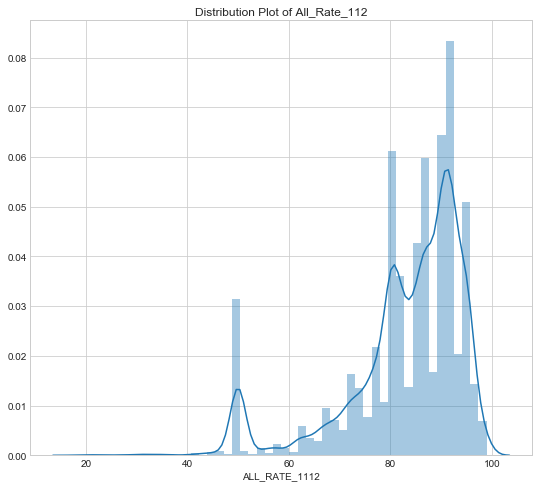

In [70]:
fig = plt.figure(figsize=(9, 8))
fig = sns.distplot(new_df['ALL_RATE_1112'], bins=50, hist_kws={'alpha': 0.4});
fig.set_title('Distribution Plot of All_Rate_112');
plt.savefig("../Images/Distribution Plot of All_Rate_112.jpg",bbox_inches='tight',pad_inches=.5);

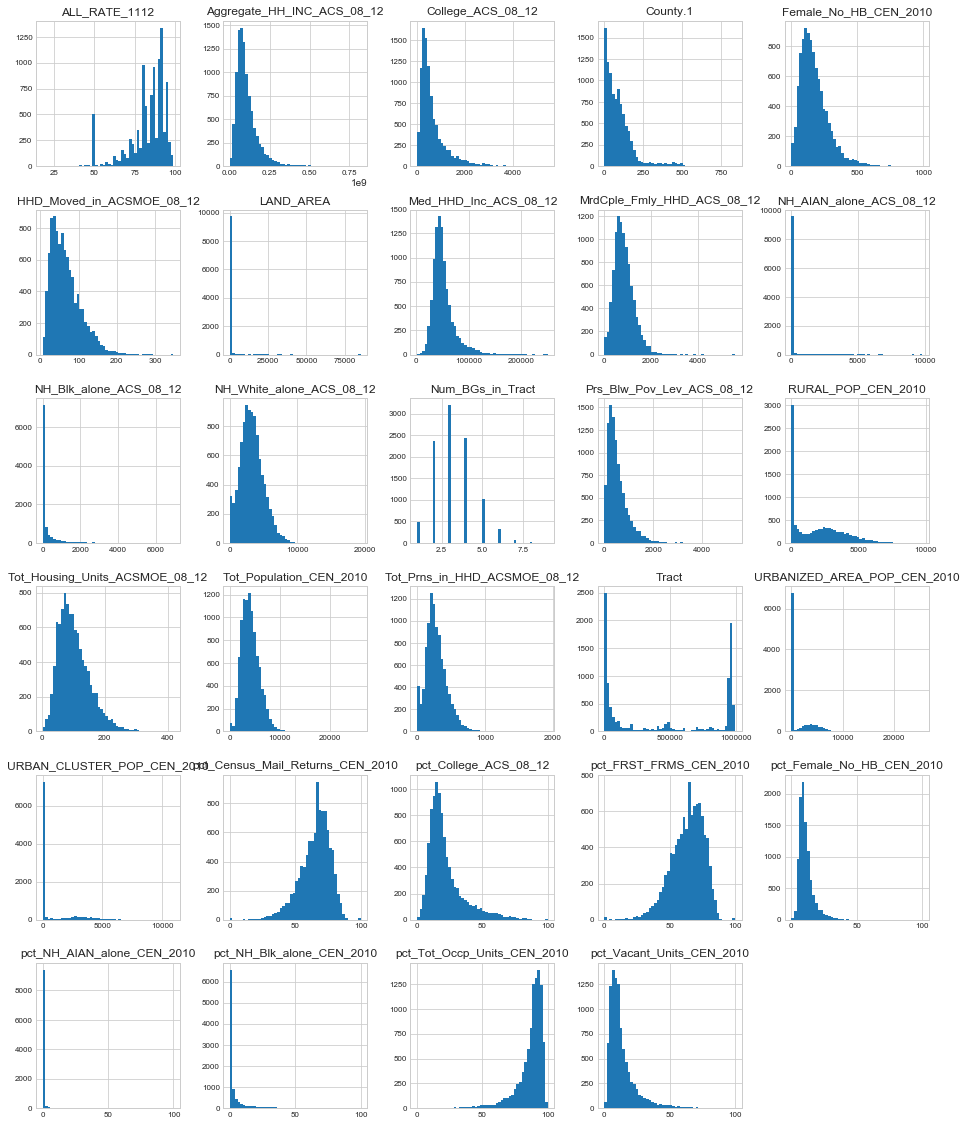

In [71]:
fig = plt.figure(figsize=(9, 8))
fig = new_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);
plt.savefig("../Images/Histogram of Features.jpg",bbox_inches='tight',pad_inches=.5);

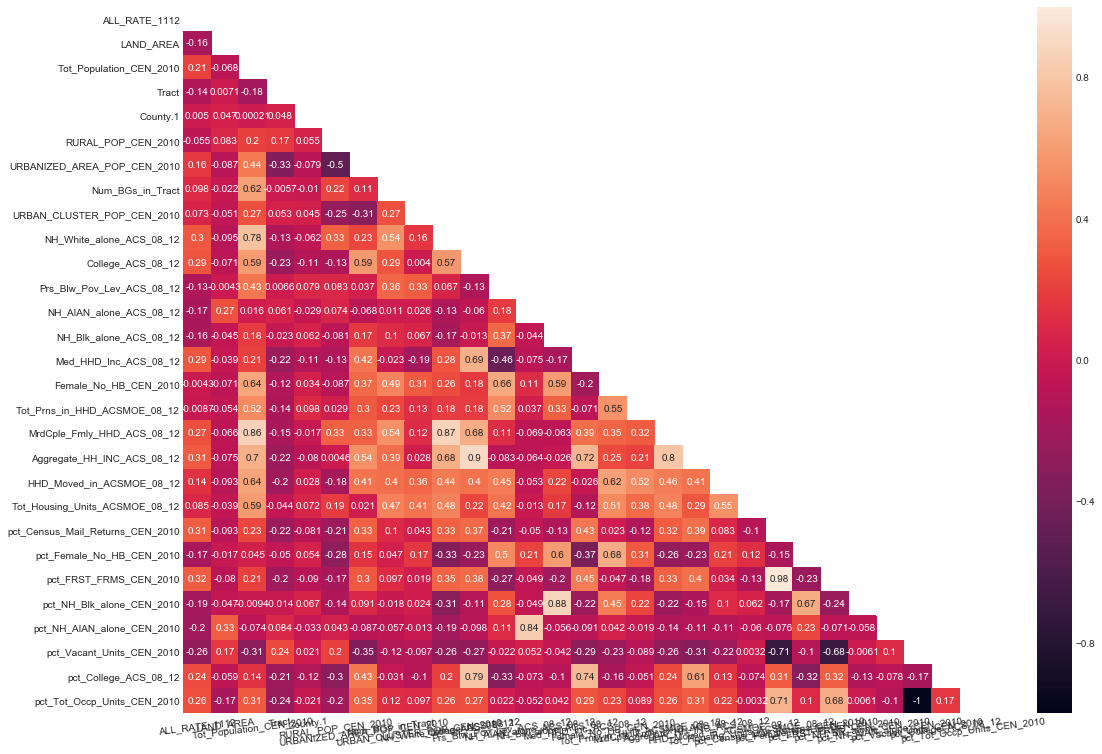

In [72]:
def corr_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize = (18,13))
    mask = np.zeros_like(corrs,dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs,mask = mask, annot = True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 10, rotation = 7)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 10, rotation = 0)
    plt.show()
corr_heat_map(new_df)


#### -Sorting Features

In [73]:
top_low_cor = new_df.corr()['ALL_RATE_1112'].abs().sort_values(ascending = False)

In [74]:
top_low_cor = new_df.corr()['ALL_RATE_1112'].abs().sort_values(ascending = False)

In [75]:
top_low_cor.head(5)

ALL_RATE_1112                       1.000000
pct_FRST_FRMS_CEN_2010              0.315808
pct_Census_Mail_Returns_CEN_2010    0.314836
Aggregate_HH_INC_ACS_08_12          0.308352
NH_White_alone_ACS_08_12            0.303507
Name: ALL_RATE_1112, dtype: float64

In [76]:
top_values_forest_df.head()

,Feature,Importance
0,LAND_AREA,0.181417
33,pct_FRST_FRMS_CEN_2010,0.058620
36,pct_NH_Blk_alone_CEN_2010,0.057156
34,pct_Female_No_HB_CEN_2010,0.047255
32,pct_Census_Mail_Returns_CEN_2010,0.039270


In [77]:
top_values_forest_df.tail()

,Feature,Importance
27,MrdCple_Fmly_HHD_CEN_2010,0.010708
30,MrdCple_Fmly_HHD_ACS_08_12,0.010312
7,URBAN_CLUSTER_POP_CEN_2010,0.007714
6,Num_BGs_in_Tract,0.006107
5,URBANIZED_AREA_POP_CEN_2010,0.004604


#### -Subplots and Regplots

In [78]:
subplot_features = ['LAND_AREA',
 'Tot_Population_CEN_2010',
 'RURAL_POP_CEN_2010',
 'URBANIZED_AREA_POP_CEN_2010',
 'Num_BGs_in_Tract',
 'URBAN_CLUSTER_POP_CEN_2010',
 'NH_White_alone_ACS_08_12',
 'College_ACS_08_12',
 'Prs_Blw_Pov_Lev_ACS_08_12',
 'NH_AIAN_alone_ACS_08_12',
 'NH_Blk_alone_ACS_08_12',
 'Med_HHD_Inc_ACS_08_12',
 'Female_No_HB_CEN_2010',
 'MrdCple_Fmly_HHD_ACS_08_12',
 'Aggregate_HH_INC_ACS_08_12',
 'pct_Census_Mail_Returns_CEN_2010',
 'pct_Female_No_HB_CEN_2010',
 'pct_FRST_FRMS_CEN_2010',
 'pct_NH_Blk_alone_CEN_2010',
 'pct_NH_AIAN_alone_CEN_2010',
 'pct_Vacant_Units_CEN_2010',
 'pct_College_ACS_08_12',
 'pct_Tot_Occp_Units_CEN_2010']

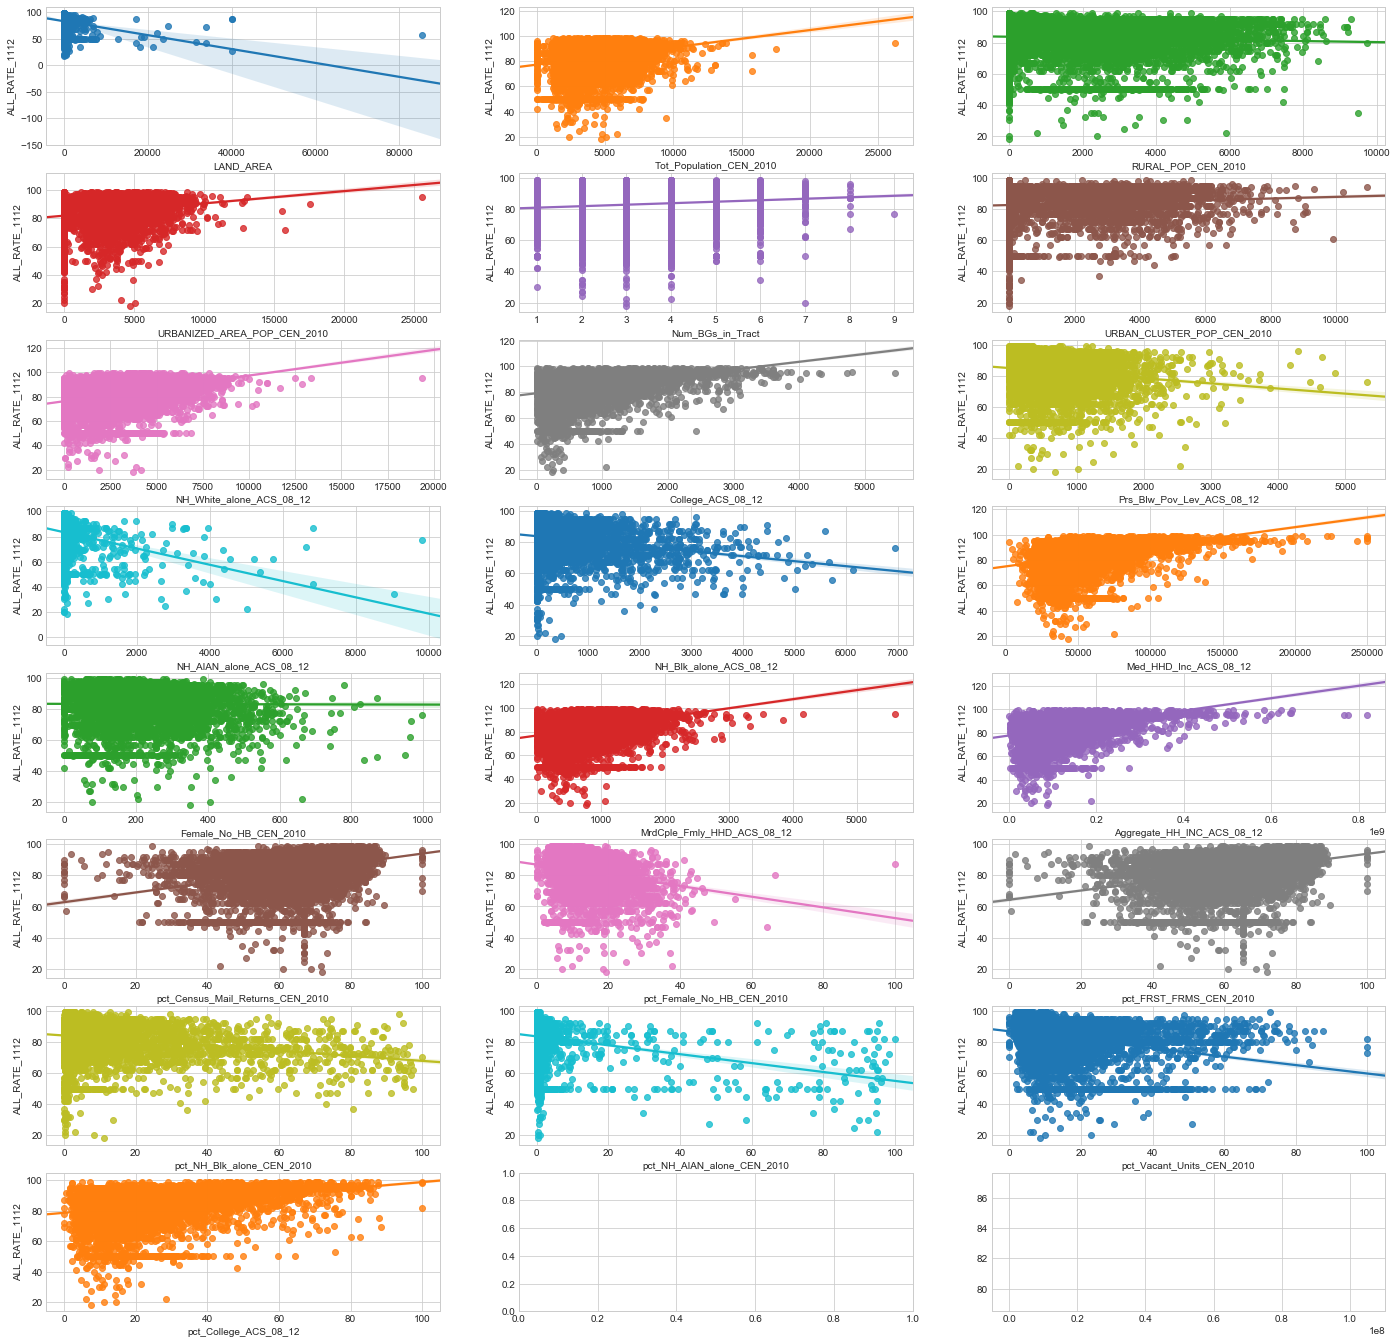

In [79]:
fig, ax = plt.subplots(round(len(subplot_features) / 3), 3, figsize = (24, 24))

for i, ax in enumerate(fig.axes):
    if i < len(subplot_features) - 1:
        sns.regplot(x=subplot_features[i],y=new_df['ALL_RATE_1112'], data=new_df[subplot_features], ax=ax)

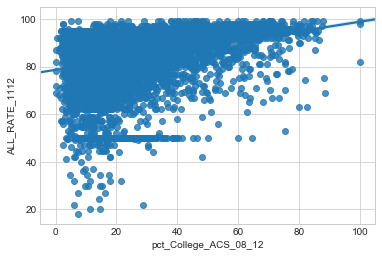

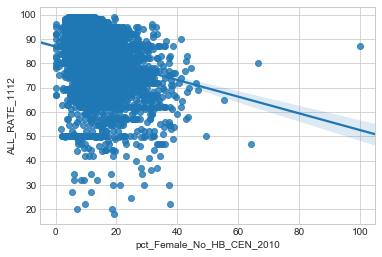

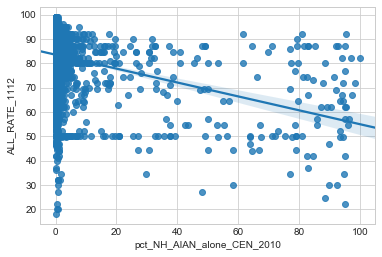

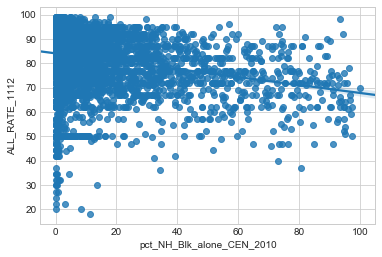

In [80]:
sns.regplot(x=new_df['pct_College_ACS_08_12'],y=new_df['ALL_RATE_1112']);
plt.show()
sns.regplot(x=new_df['pct_Female_No_HB_CEN_2010'],y=new_df['ALL_RATE_1112']);
plt.show()
sns.regplot(x=new_df['pct_NH_AIAN_alone_CEN_2010'],y=new_df['ALL_RATE_1112']);
plt.show()
sns.regplot(x=new_df['pct_NH_Blk_alone_CEN_2010'],y=new_df['ALL_RATE_1112']);
plt.show()

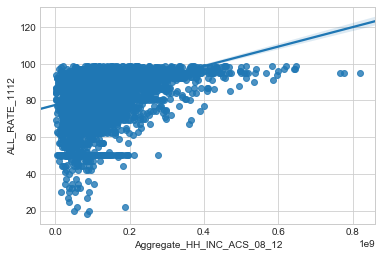

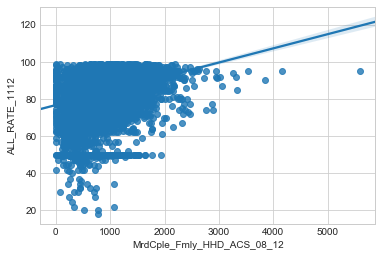

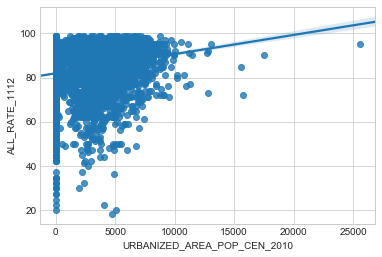

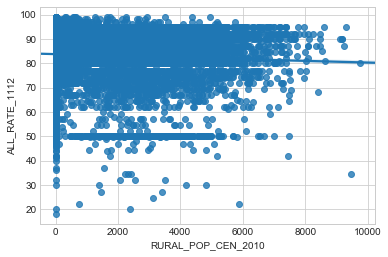

In [81]:
sns.regplot(x=new_df['Aggregate_HH_INC_ACS_08_12'],y=new_df['ALL_RATE_1112']);
plt.show()
sns.regplot(x=new_df['MrdCple_Fmly_HHD_ACS_08_12'],y=new_df['ALL_RATE_1112']);
plt.show()
sns.regplot(x=new_df['URBANIZED_AREA_POP_CEN_2010'],y=new_df['ALL_RATE_1112']);
plt.show()
sns.regplot(x=new_df['RURAL_POP_CEN_2010'],y=new_df['ALL_RATE_1112']);
plt.show()

## 6. Models for prediction

In [82]:
features_model = [
    'RURAL_POP_CEN_2010','URBANIZED_AREA_POP_CEN_2010','MrdCple_Fmly_HHD_ACS_08_12',
    'Aggregate_HH_INC_ACS_08_12','pct_NH_Blk_alone_CEN_2010','pct_NH_AIAN_alone_CEN_2010',
    'pct_Female_No_HB_CEN_2010','pct_College_ACS_08_12','Prs_Blw_Pov_Lev_ACS_08_12',
    'pct_Tot_Occp_Units_CEN_2010'
    ]

In [83]:
X = df[features_model].fillna(0)
y = df["ALL_RATE_1112"].fillna(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1000)

In [84]:
def show_results(fitted_obj,X_test = X_test, y_test = y_test):
    print("Best Params:", fitted_obj.best_params_)
    print("Best Accuracy:", fitted_obj.best_score_)
    print("Best Holdout Accuracy:", fitted_obj.score(X_test,y_test))

In [85]:
rf_params = {
             'n_estimators':[5,10,20,50],
             'min_samples_split':[2,5,10,20],
             'max_features':['auto', .5,.7,1.0],
             'max_depth':[None, 3,5,10]
}

rf_gs = GridSearchCV(RandomForestRegressor(), rf_params, verbose=1, n_jobs=-1)

In [86]:
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  1.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20], 'max_features': ['auto', 0.5, 0.7, 1.0], 'max_depth': [None, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [87]:
ext_params = {
             'n_estimators':[5,10,20,50],
             'min_samples_split':[2,5,10,20],
             'max_features':['auto', .5,.7,1.0],
             'max_depth':[None, 3,5,10]
}

ext_gs = GridSearchCV(ExtraTreesRegressor(), ext_params, verbose=1, n_jobs=-1)

In [88]:
ext_gs.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:   34.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20], 'max_features': ['auto', 0.5, 0.7, 1.0], 'max_depth': [None, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [89]:
dt_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2',2,3,5],
    'min_samples_split':[3,5,10,20,35,50]
}

In [90]:
dt_gs = GridSearchCV(DecisionTreeRegressor(),dt_params,verbose = 1, n_jobs = -1)

In [91]:
dt_gs.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 2, 3, 5], 'min_samples_split': [3, 5, 10, 20, 35, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [92]:
bg_params = {"base_estimator__max_depth": [3,5,10, None],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [5, 10, 20, 50]}
bg_gs = GridSearchCV(BaggingRegressor(DecisionTreeRegressor()),bg_params,verbose=1,n_jobs=-1)

In [93]:
bg_gs.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   49.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
       ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator__max_depth': [3, 5, 10, None], 'max_features': [0.5, 0.7, 1.0], 'max_samples': [0.5, 0.7, 1.0], 'n_estimators': [5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### Results

In [94]:
print("Results for Random Forest:")
show_results(rf_gs)

Results for Random Forest:
Best Params: {'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 50}
Best Accuracy: 0.24097423569308585
Best Holdout Accuracy: 0.27186379669931926


In [95]:
print("Extra Trees:")
show_results(ext_gs)

Extra Trees:
Best Params: {'max_depth': None, 'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 50}
Best Accuracy: 0.2523849237013767
Best Holdout Accuracy: 0.2860648892027723


In [96]:
print("Decision Tree:")
show_results(dt_gs)

Decision Tree:
Best Params: {'max_depth': 4, 'max_features': None, 'min_samples_split': 3}
Best Accuracy: 0.18025915454351904
Best Holdout Accuracy: 0.1817392097555126


In [97]:
print("Bagging:")
show_results(bg_gs)

Bagging:
Best Params: {'base_estimator__max_depth': 10, 'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 50}
Best Accuracy: 0.24127813738207518
Best Holdout Accuracy: 0.26868663601470455


#### The model that gave the highest holdout accuracy score was Random Forest at .665; Hence, we can now fit this model on the entire data set.